In [1]:
import pandas as pd
import numpy as np
import pycaret.clustering as pc
import matplotlib.pyplot as plt
import pycaret.classification as cp
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../dataset/FinalData.csv')

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,70,59,43,20.879744,82.002744,6.502985,202.935536,rice
1,82,59,38,21.770462,80.319644,7.038096,226.655537,rice
2,75,39,41,23.004459,82.320763,7.840207,263.964248,rice
3,74,37,43,26.491096,80.158363,6.980401,242.864034,rice
4,74,50,40,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# lets check if there is any missing value present in the dataset
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
#Checking the basic information of dataset like count, datatypes of columns (categorical or numerical)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1500 non-null   int64  
 1   P            1500 non-null   int64  
 2   K            1500 non-null   int64  
 3   temperature  1500 non-null   float64
 4   humidity     1500 non-null   float64
 5   ph           1500 non-null   float64
 6   rainfall     1500 non-null   float64
 7   label        1500 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 93.9+ KB


In [6]:
#All columns are numerical except label which is categorical

In [7]:
#Removing duplicate rows if any
data.drop_duplicates()

,N,P,K,temperature,humidity,ph,rainfall,label
0,70,59,43,20.879744,82.002744,6.502985,202.935536,rice
1,82,59,38,21.770462,80.319644,7.038096,226.655537,rice
2,75,39,41,23.004459,82.320763,7.840207,263.964248,rice
3,74,37,43,26.491096,80.158363,6.980401,242.864034,rice
4,74,50,40,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
1495,116,39,30,26.774637,66.413269,6.780064,177.774507,coffee
1496,107,15,28,27.417112,56.636362,6.086922,127.924610,coffee
1497,105,18,27,24.131797,67.225123,6.362608,173.322839,coffee
1498,113,33,26,26.272418,52.127394,6.758793,127.175293,coffee


In [8]:
data.shape

(1500, 8)

In [9]:
# Checking whether dataset is balanced or not
data['label'].value_counts()

rice            100
maize           100
kidney beans    100
black gram      100
pomegranate     100
banana          100
mango           100
grapes          100
apple           100
orange          100
papaya          100
coconut         100
cotton          100
jute            100
coffee          100
Name: label, dtype: int64

In [10]:
#Checking the unique classes in label (output)
data['label'].unique()

array(['rice', 'maize', 'kidney beans', 'black gram', 'pomegranate',
       'banana', 'mango', 'grapes', 'apple', 'orange', 'papaya',
       'coconut', 'cotton', 'jute', 'coffee'], dtype=object)

In [11]:
#Checking the unique classes in label (output)
data['label'].nunique()

15

In [12]:
data.describe(include="all")

,N,P,K,temperature,humidity,ph,rainfall,label
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,52.690667,56.112667,53.371333,25.430545,75.113914,6.390652,121.728344,NaN
std,37.484838,36.660405,58.873924,5.393916,19.624902,0.642545,51.150488,NaN
min,0.000000,5.000000,5.000000,8.825675,18.092240,4.507524,40.351531,NaN
25%,21.000000,28.000000,22.000000,22.616237,64.589876,5.884768,87.736901,NaN
50%,39.000000,50.000000,33.500000,25.046573,81.319567,6.351950,107.711167,NaN
75%,88.000000,71.000000,46.000000,27.988736,90.876194,6.835967,149.770282,NaN


In [13]:
#Shows summary statistics of datset. Here we can know the data quality is good by checking how close in mean and median.
#In this dataset temperature and ph seems to have better distribution, other columns may have outliers.

In [14]:
# lets check the Summary for all the crops

print("Average Ratio of Nitrogen in the Soil : {0:.2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorous in the Soil : {0:.2f}".format(data['P'].mean()))
print("Average Ratio of Potassium in the Soil : {0:.2f}".format(data['K'].mean()))
print("Average Tempature in Celsius : {0:.2f}".format(data['temperature'].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(data['humidity'].mean()))
print("Average PH Value of the soil : {0:.2f}".format(data['ph'].mean()))
print("Average Rainfall in mm : {0:.2f}".format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil : 52.69
Average Ratio of Phosphorous in the Soil : 56.11
Average Ratio of Potassium in the Soil : 53.37
Average Tempature in Celsius : 25.43
Average Relative Humidity in % : 75.11
Average PH Value of the soil : 6.39
Average Rainfall in mm : 121.73


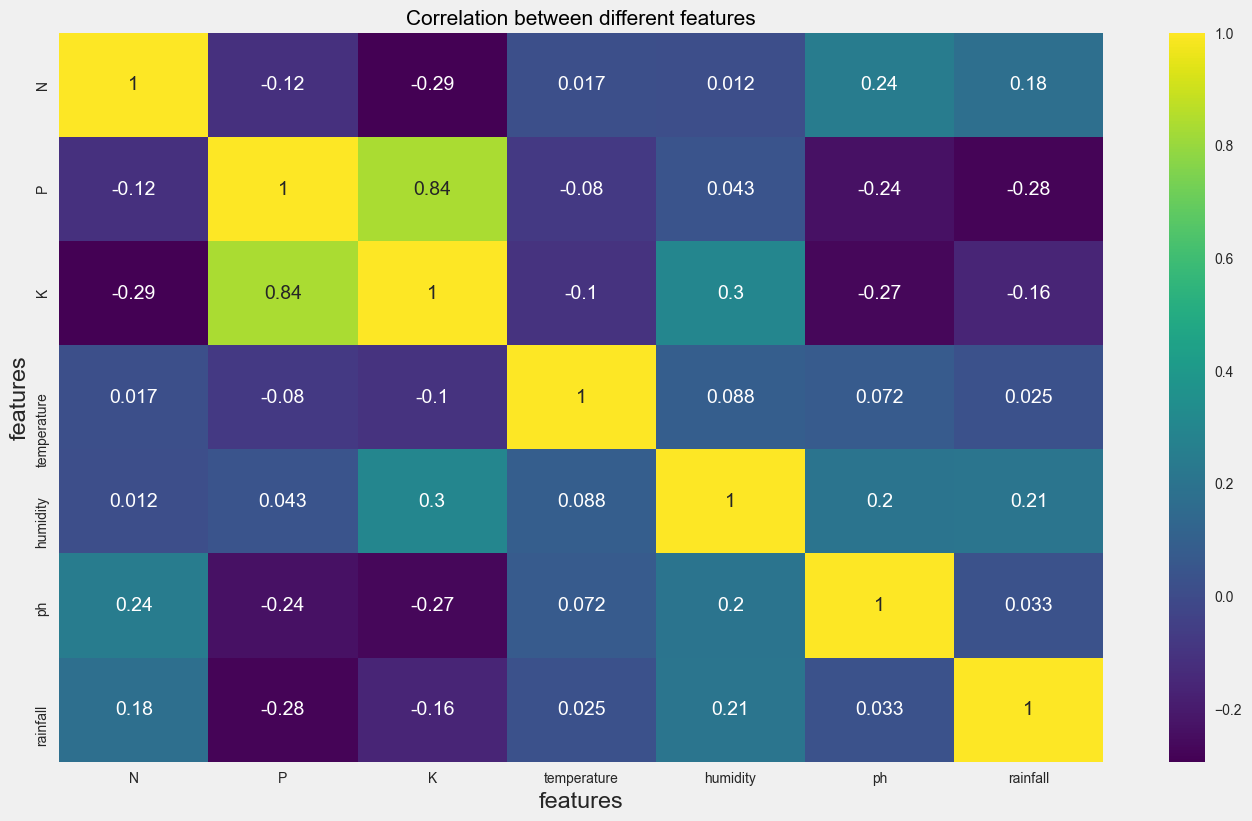

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(data.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')
#f,ax=plt.subplots(figsize=(5,5))
plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [16]:
#Correlation between Potassium and Phosphorus is high.

In [17]:
crop_summary = pd.pivot_table(data,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,200.44,19.27,133.83,92.333383,5.929663,112.654779,22.630942
banana,49.99,100.54,83.08,80.358123,5.983893,104.626980,27.376798
black gram,19.95,38.04,68.49,65.118426,7.133952,67.884151,29.973340
coconut,29.75,18.66,17.70,94.844272,5.976562,175.686646,27.409892
coffee,30.20,98.78,26.58,58.869846,6.790308,158.066295,25.540477


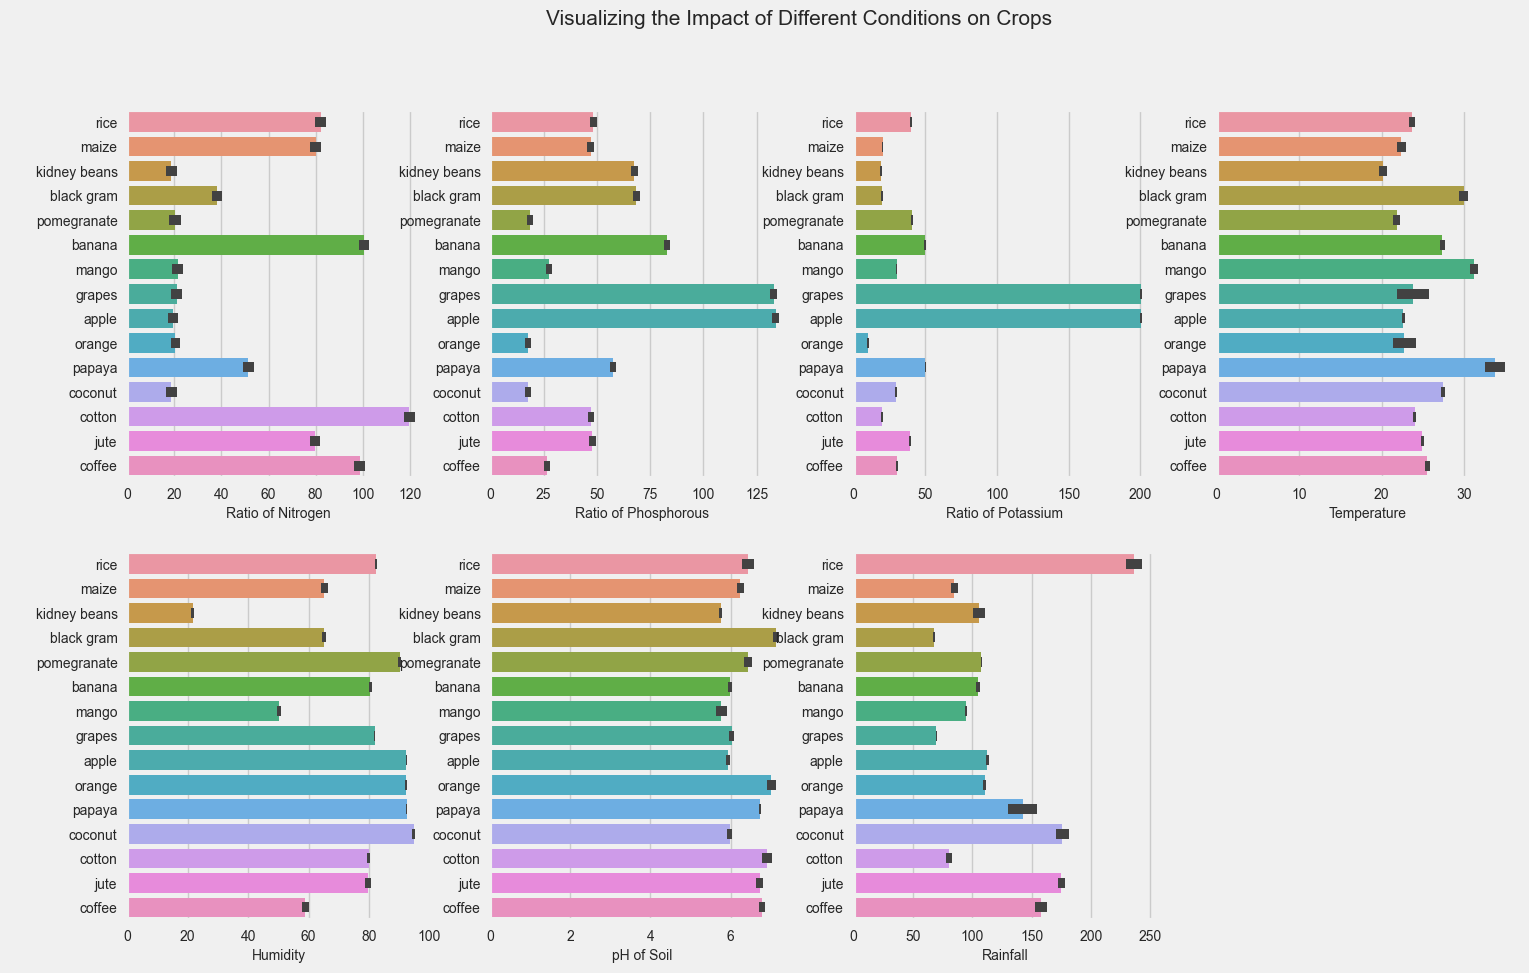

In [18]:
### Data Visualizations

plt.rcParams['figure.figsize'] = (16,10)

plt.subplot(2, 4, 1)
sns.barplot(data['N'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Nitrogen', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 2)
sns.barplot(data['P'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Phosphorous', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 3)
sns.barplot(data['K'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Potassium', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 4)
sns.barplot(data['temperature'], data['label'])
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 5)
sns.barplot(data['humidity'], data['label'])
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 6)
sns.barplot(data['ph'], data['label'])
plt.ylabel(' ')
plt.xlabel('pH of Soil', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 7)
sns.barplot(data['rainfall'], data['label'])
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize = 10)
plt.yticks(fontsize = 10)

plt.suptitle('Visualizing the Impact of Different Conditions on Crops', fontsize = 15)
plt.show()

CLASSIFICATION

In [19]:
clasf =  cp.setup(data,target='label',session_id=123)

,Description,Value
0,session_id,123
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,"apple: 0, banana: 1, black gram: 2, coconut: 3, coffee: 4, cotton: 5, grapes: 6, jute: 7, kidney beans: 8, maize: 9, mango: 10, orange: 11, papaya: 12, pomegranate: 13, rice: 14"
4,Original Data,"(1500, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [20]:
best_model = cp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9981,1.0000,0.9981,0.9983,0.9981,0.9980,0.9980,0.3470
nb,Naive Bayes,0.9952,0.9999,0.9952,0.9958,0.9952,0.9949,0.9949,0.0180
et,Extra Trees Classifier,0.9943,1.0000,0.9943,0.9948,0.9943,0.9939,0.9939,0.3150
qda,Quadratic Discriminant Analysis,0.9895,0.9999,0.9894,0.9906,0.9895,0.9888,0.9889,0.0170
lightgbm,Light Gradient Boosting Machine,0.9895,0.9999,0.9896,0.9908,0.9896,0.9888,0.9889,0.3870
gbc,Gradient Boosting Classifier,0.9886,0.9999,0.9887,0.9907,0.9885,0.9877,0.9879,1.8060
dt,Decision Tree Classifier,0.9876,0.9934,0.9871,0.9889,0.9875,0.9867,0.9868,0.0160
lda,Linear Discriminant Analysis,0.9838,0.9998,0.9833,0.9863,0.9836,0.9826,0.9828,0.0120
knn,K Neighbors Classifier,0.9800,0.9990,0.9794,0.9829,0.9796,0.9785,0.9788,0.0860
lr,Logistic Regression,0.9771,0.9996,0.9763,0.9796,0.9770,0.9755,0.9757,1.8390


In [21]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [22]:
model  = cp.create_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9905,1.0000,0.9905,0.9917,0.9904,0.9898,0.9899
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9905,0.9998,0.9905,0.9917,0.9904,0.9898,0.9899
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000


In [23]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [24]:
tuned = cp.tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9810,1.0000,0.9810,0.9852,0.9806,0.9796,0.9800
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9905,0.9998,0.9905,0.9917,0.9904,0.9898,0.9899
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9905,0.9999,0.9905,0.9917,0.9904,0.9898,0.9899
5,0.9905,1.0000,0.9905,0.9917,0.9904,0.9898,0.9899
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9619,0.9996,0.9619,0.9728,0.9609,0.9592,0.9601


In [25]:
tuned

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [40]:
fr = cp.interpret_model(model,plot='pfi')

7it [00:00,  8.10it/s]


In [41]:
fr

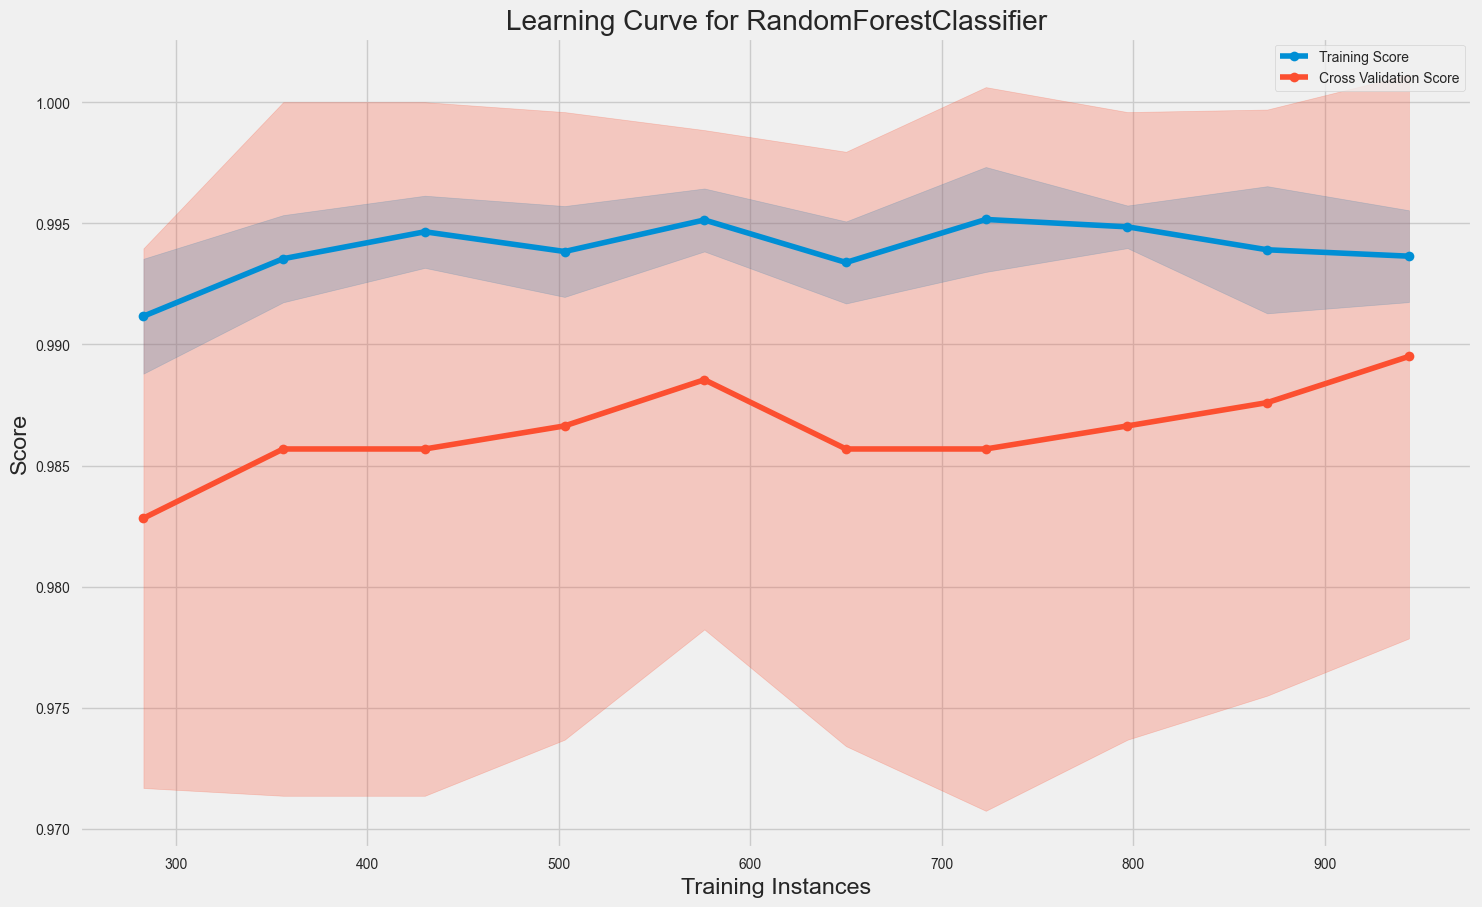

In [48]:
graph = cp.plot_model(tuned,plot='learning')

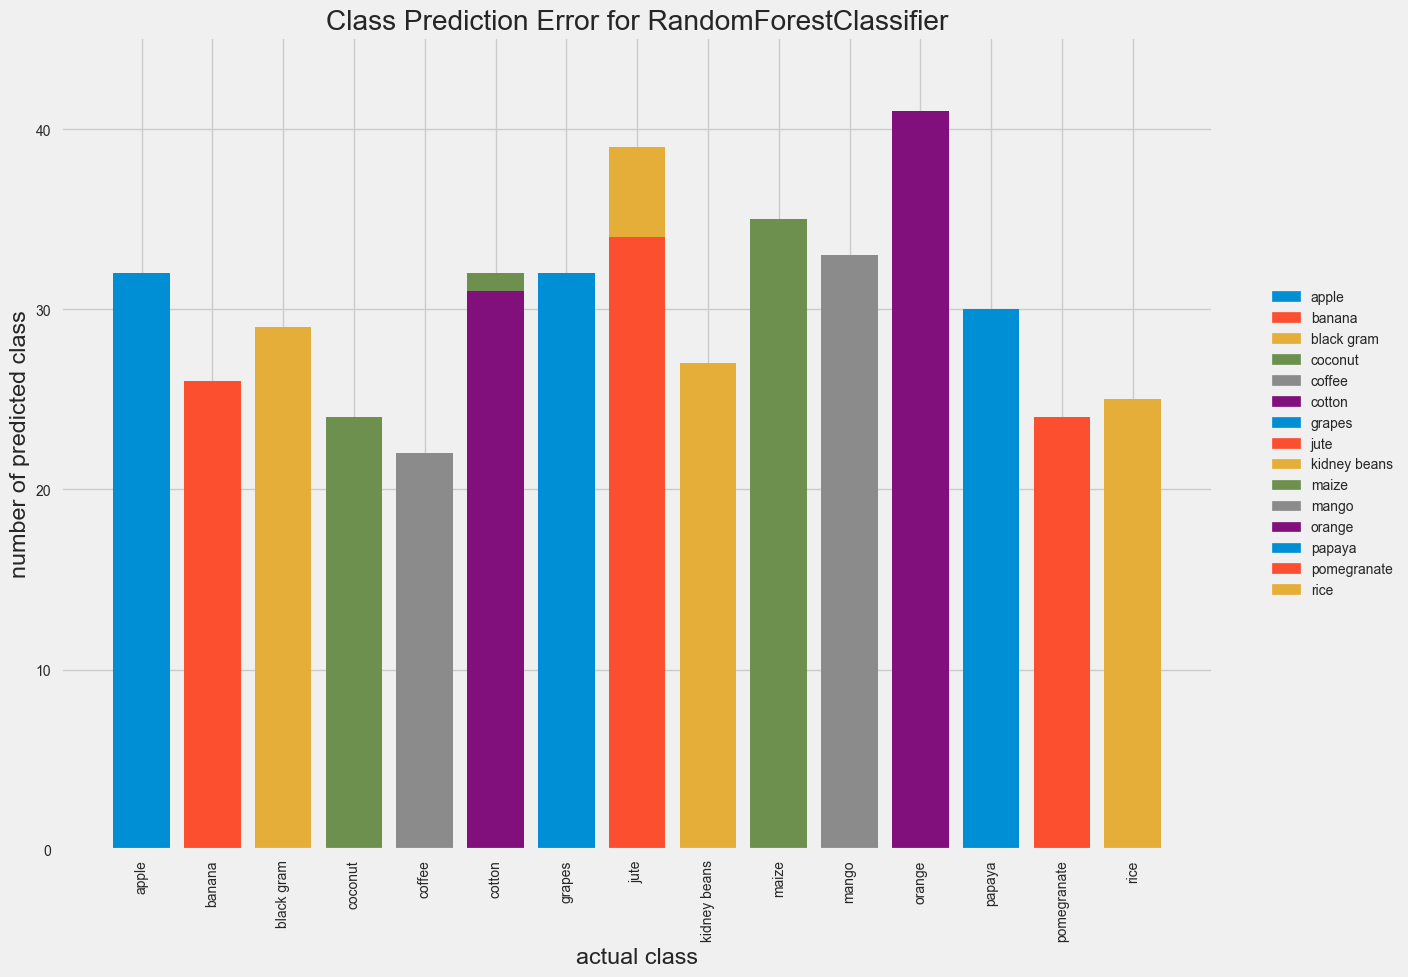

In [49]:
cp.plot_model(tuned,plot='error')

In [50]:
cp.predict_model(tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9867,0.9997,0.9870,0.9882,0.9866,0.9857,0.9859


,N,P,K,temperature,humidity,ph,rainfall,label,Label,Score
0,36.0,122.0,196.0,12.756796,81.624977,6.130311,66.778442,grapes,grapes,0.9698
1,98.0,40.0,30.0,24.407267,62.656925,6.410993,148.697739,coffee,coffee,0.7056
2,93.0,83.0,46.0,25.868248,78.524002,5.740555,116.301956,banana,banana,0.8905
3,44.0,55.0,49.0,38.419163,91.142204,6.751453,119.265388,papaya,papaya,0.8254
4,0.0,64.0,23.0,22.954582,24.035532,5.858618,107.731537,kidney beans,kidney beans,0.9288
...,...,...,...,...,...,...,...,...,...,...
446,26.0,72.0,17.0,34.898148,63.599487,6.972977,64.727974,black gram,black gram,0.8746
447,9.0,29.0,36.0,19.810694,88.929443,5.740338,102.860085,pomegranate,pomegranate,0.8222
448,34.0,55.0,45.0,31.701838,91.662323,6.953439,48.838104,papaya,papaya,0.6418
449,21.0,68.0,23.0,22.986670,20.579407,5.916780,143.858490,kidney beans,kidney beans,0.9761


In [52]:
final = cp.finalize_model(tuned)

In [57]:
cp.save_model(final, "../model/crop-model-classification")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='label',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=6,
                                         max_features

In [58]:
unknown_data = pd.DataFrame([{'N':70,'P':59,'K':43,'rainfall':202,'humidity':82,'ph':7,'temperature':20}])

In [59]:
saved_model = cp.load_model("../model/crop-model-classification")

Transformation Pipeline and Model Successfully Loaded


In [60]:
pred = cp.predict_model(saved_model,unknown_data)

In [61]:
pred

,N,P,K,rainfall,humidity,ph,temperature,Label,Score
0,70,59,43,202,82,7,20,rice,0.7545
